In [1]:
from image_utils import *

<h1>Operaciones avanzadas</h1>
<h2>Detección de bordes</h2>

La mayor parte de la información de una imagen se encuentra contenida en sus bordes (ej: número de puntos de un dado)

<h3>Detección de bordes con Canny</h3>
<p>Método estándar más usado, más preciso y rápido que Sobel. Requiere como entrada un arreglo de dos dimensiones, es decir, una imagen en escala de grices. Este filtro aplica un filtro gauseano previo a la detección de bordes, la intensidad del filtro se puede controlar a través del argumento <i>sigma</i>; si es más bajo, se podrán detectar más bordes, si es demasiado alto, la imagen tendrá menos ruido pero se perderán los bordes.</p>

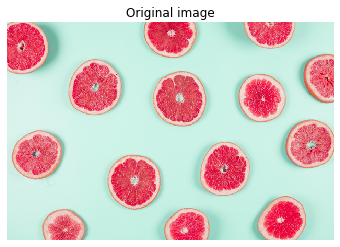

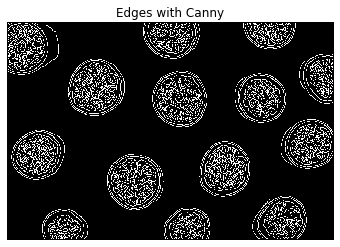

In [2]:
from skimage import color
# Import the canny edge detector 
from skimage.feature import canny

show_image(grapefruit, "Original image")

# Convert image to grayscale
grapefruit_gray = color.rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit_gray)

# Show resulting image
show_image(canny_edges, "Edges with Canny")

Variando el valor de sigma:

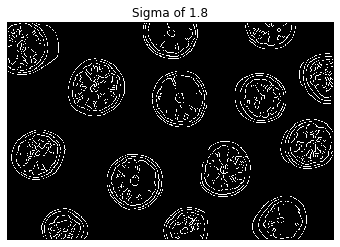

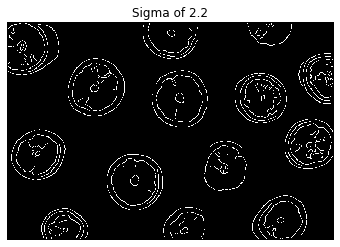

In [3]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit_gray, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit_gray, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

<h2>Detección de esquinas</h2>
<p>Utilizado para detección de movimiento, video tracking, reconocimiento de objetos, etc. Una esquina se puede definir como la intersección de dos bordes. Se puede buscar coincidencias de las esquinas de una imagen vs su versión rotada.</p>

<h3>Detector de esquinas de Harris</h3>
<p>Requiere de una imagen en escala de grices como entrada</p>

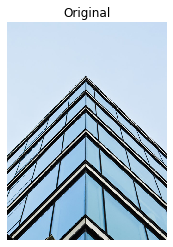

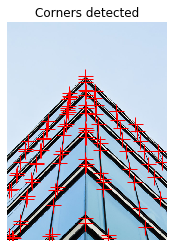

In [4]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks
from skimage import color

# Convert image from RGB to grayscale
building_image_gray = color.rgb2gray(building_image)

# Apply the detector to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2)

# Show original and resulting image with corners detected
show_image(building_image, 'Original')
show_image_with_corners(building_image, coords)

Número de esquinas encontradas:

With a min_distance set to 2, we detect a total 98 corners in the image.


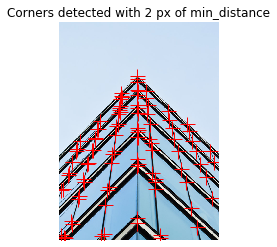

In [5]:
# Find the peaks with a min distance of 2 pixels
coords_w_min_2 = corner_peaks(measure_image, min_distance=2)
print("With a min_distance set to 2, we detect a total", len(coords_w_min_2), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_2, "Corners detected with 2 px of min_distance")


With a min_distance set to 40, we detect a total 36 corners in the image.


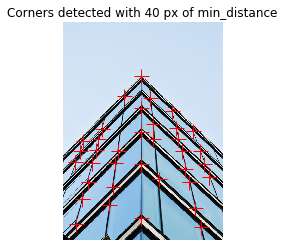

In [6]:
# Find the peaks with a min distance of 40 pixels
coords_w_min_40 = corner_peaks(measure_image, min_distance=40)
print("With a min_distance set to 40, we detect a total", len(coords_w_min_40), "corners in the image.")

show_image_with_corners(building_image, coords_w_min_40, "Corners detected with 40 px of min_distance")

<h2>Detección facial</h2>

<p>Aplicaciones:</p>
<ul>
    <li>Filtros</li>
    <li>Auto enfoque</li>
    <li>Recomendaciones</li>
    <li>Difuminado para protección de privacidad</li>
    <li>Reconocer emociones</li>
</ul>
<p>Requiere de un clasificador en cascada (es decir, muchos clasificadores en uno). Para el ejemplo se utilizará uno por defecto de sci-kit image. Argumentos:</p>
<ul>
    <li>scale_factor: factor por el cual se agrandará la ventana de busqueda de rostros.</li>
    <li>step_ratio: 1 representa una búsqueda exhaustiva (que puede ser lenta). Aumentando este valor se obtienen peores resultados, pero mejoran los tiempos de cómputo. Generalmente se utilizan valores entre 1 y 1.5.</li>
    <li>min_size: tamaño mínimo de la ventana.</li>
    <li>max_size: tamaño máximo de la ventana.</li>
</ul>
<p>El detector retorna las coordinadas del cuadro donde se encuentra el rostro.</p>

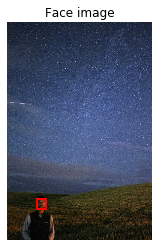

{'r': 774, 'c': 131, 'width': 40, 'height': 40}


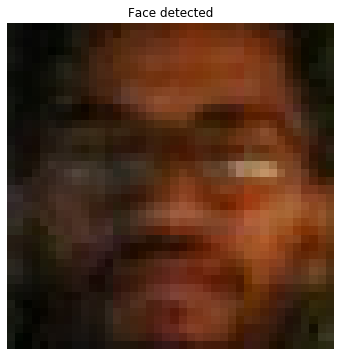

In [7]:
from skimage import data
from skimage.feature import Cascade

# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(night_image, detected)

Con múltiples rostros:

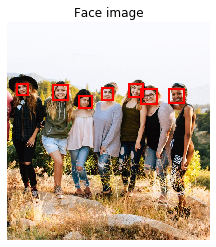

{'r': 202, 'c': 31, 'width': 36, 'height': 36}


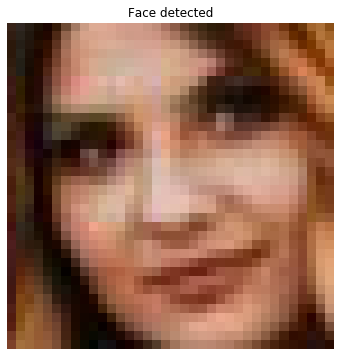

{'r': 207, 'c': 152, 'width': 47, 'height': 47}


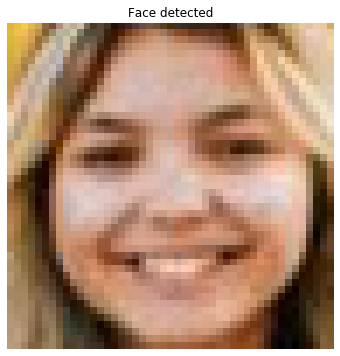

{'r': 217, 'c': 311, 'width': 39, 'height': 39}


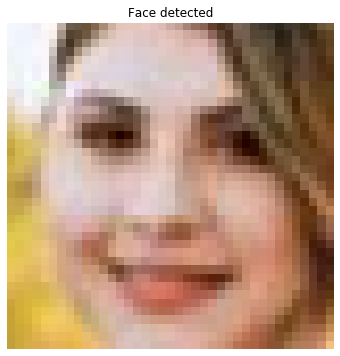

{'r': 242, 'c': 237, 'width': 41, 'height': 41}


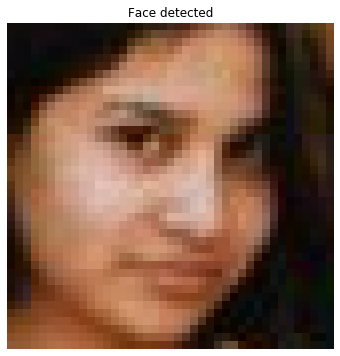

{'r': 202, 'c': 402, 'width': 45, 'height': 45}


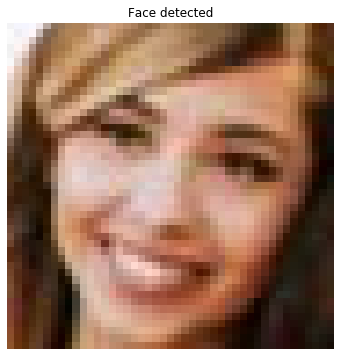

{'r': 219, 'c': 533, 'width': 48, 'height': 48}


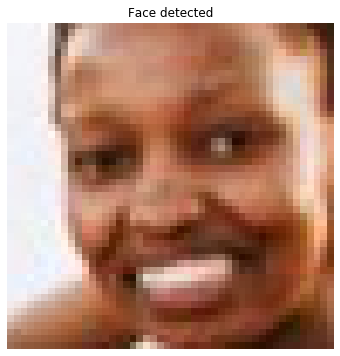

{'r': 218, 'c': 440, 'width': 52, 'height': 52}


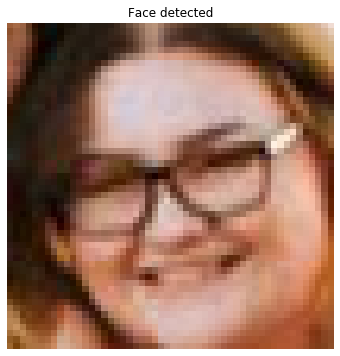

In [8]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

Utilizando segmentación:

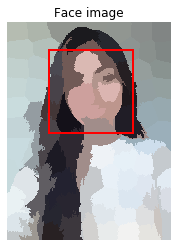

{'r': 110, 'c': 169, 'width': 340, 'height': 340}


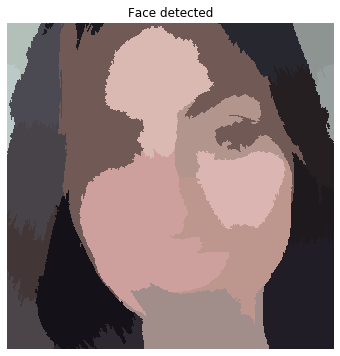

In [9]:
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segmentation with default 100 regions
segments = slic(profile_image)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)